In [505]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The <b>Meteoritical Society</b> collects data on meteorites that have fallen to Earth from outer space. This dataset includes the location, mass, composition, and fall year for over 45,000 meteorites that have struck our planet.

The dataset contains the following columns:
<ul>
    <li> <b>name</b> - name of meteorite </li>
    <li> <b>id</b> - unique identifier </li>
    <li> <b>nametype</b> - name (valid or relict) </li>
    <li> <b>recclass</b> - class of meteorite </li>
    <li> <b>mass</b> - mass of meteorite </li>
    <li> <b>fall</b> - if the metheorite was seeing falling or was found</li>
    <li> <b>year</b> - year when the meteorite fell or was found </li>
    <li> <b>reclat</b> - latitude of meterite's landing </li>
    <li> <b>reclong</b> - longitude of meteorite's landing </li>
    <li> <b>GeoLocation</b> - (reclat, reclong) </li>
</ul>
    

## Load the data

In [506]:
df = pd.read_csv('data.csv')
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


## Data Analysis

In [507]:
df.dtypes

name            object
id               int64
nametype        object
recclass        object
mass           float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object

In [508]:
df.shape

(45716, 10)

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In our df with 45716 rows and 10 columns, we have 5 object columns and 5 number columns.

### Null Values

In [510]:
df.isnull().sum()

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64

Let us see the percentage of missing values for each column:

In [511]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
name,name,0.000000
id,id,0.000000
nametype,nametype,0.000000
recclass,recclass,0.000000
mass,mass,0.286552
fall,fall,0.000000
year,year,0.629976
reclat,reclat,16.000962
reclong,reclong,16.000962
GeoLocation,GeoLocation,16.000962


As it can be seen, we have around 16% of missing values in the following columns: 'reclat', 'reclong' and 'GeoLocation'.   
Since we have to predict 'reclat' and 'reclong', those null values should to be droped from our df.
Also, we will drop the rows where the 'year' and 'mass' have null values.

In [512]:
df1 = df.dropna(subset=['reclat', 'reclong'])
df1.isnull().sum()

name             0
id               0
nametype         0
recclass         0
mass           119
fall             0
year           175
reclat           0
reclong          0
GeoLocation      0
dtype: int64

In [513]:
df1['reclat'].describe()

count    38401.000000
mean       -39.122580
std         46.378511
min        -87.366670
25%        -76.714240
50%        -71.500000
75%          0.000000
max         81.166670
Name: reclat, dtype: float64

In [514]:
df1['reclong'].describe()

count    38401.000000
mean        61.074319
std         80.647298
min       -165.433330
25%          0.000000
50%         35.666670
75%        157.166670
max        354.473330
Name: reclong, dtype: float64

From Geography lessons, we know that the <b>latitude</b> is in the range [-90, 90] and the <b>longitude</b> is in the range [-180, 180]. I applied this 'filter', and unfortunately, the data was reduced with 13k rows (it is a huge number for our dataset, therefore, the code below, is commented).

In [414]:
# df1 = df1[((df1.reclong >= -180) & (df1.reclong <= 180)) & ((df.reclat >= -90) & (df.reclong <= 90))]

In [515]:
df1.shape

(38401, 10)

Looks better now, but it in not good enough. Let us analyse each column in part.

## Columns Analysis

In the next 'sections', we will analyse each column, handle the NaN values, if they exist and also we will work with outliers.

In [516]:
# function that plots the quartiles lines
def plot_lines(param1, param2, param3, param4, param5):
    line1 = plt.axvline(param1, 0, 1.0 , color='pink')
    line2 = plt.axvline(param2, 0, 1.0 , color='r')
    line3 = plt.axvline(param3, 0, 1.0 , color='g')
    line4 = plt.axvline(param4, 0, 1.0 , color='black')
    line5 = plt.axvline(param5, 0, 1.0 , color='y')
    plt.legend([line1, line2, line3, line4, line5], ['0%', '25%', '50%', '75%', '100%'], loc='upper right')

### Year column

The <b>'year'</b> column describes when the landing of the meteorite was recorded.

In [517]:
df1['year'].describe()

count    38226.000000
mean      1989.761236
std         29.072865
min        301.000000
25%       1986.000000
50%       1996.000000
75%       2002.000000
max       2501.000000
Name: year, dtype: float64

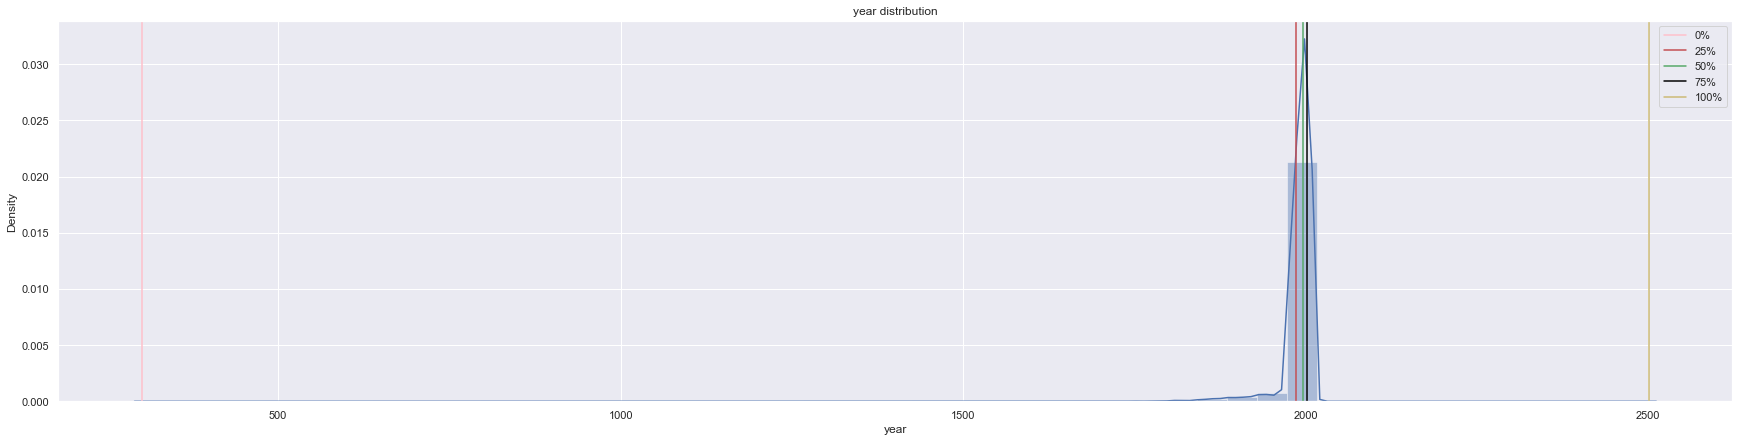

In [518]:
sns.set(rc={"figure.figsize":(30, 7)}) #width=30, height=7
sns.distplot(df1.year)
plt.title('year distribution');
plot_lines(301, 1986, 1996, 2002, 2501)

As it can be seen, we don't have a normal distribution, which will be a perfect scenario. If we look in the figure below, we can say that the distribution of the values from year column are a NARROW BETA DISTRIBUTION. <br>
Short conclusion: the first(0%) quartile is far from the second one (25%) and last (100%) quartiles is bit closer to the 4th (75%). The second, third and fourth quartile are significally close to each other, which results that the most landings were recored between 1986 and 2002. Our data is very left skewed. 
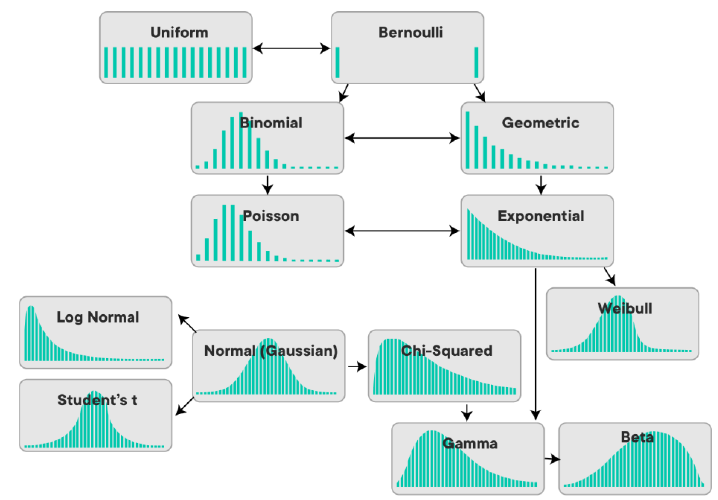

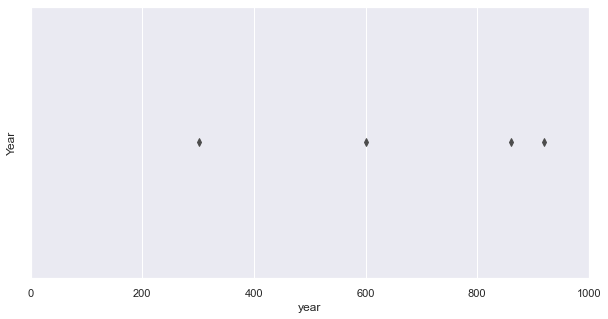

In [519]:
plt.figure(figsize=(10,5))
plt.xlim(0,1000)
plt.ylabel('Year')
sns.boxplot(x=df1['year'])
plt.show()

In the boxplot above, we see the some points of the column 'year', which might look like some outliers. In order to be sure of it, we will use some algorithms which will detect the anomalies. 
Before preceeding to that step, the data will be first normalized with <b>Min-Max Scaler</b>, then, we will handle those 175 null values and only after this, we will use IsolationForest.

In [520]:
from sklearn.preprocessing import MinMaxScaler
min_max1 = MinMaxScaler()
df_year_scaled = min_max1.fit_transform(df1[['year']])

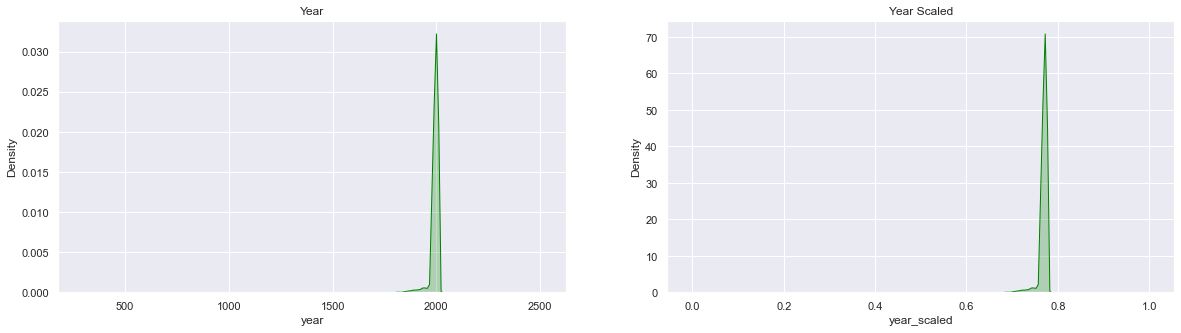

In [521]:
df1['year_scaled'] = min_max1.fit_transform(df1[['year']])
fig = plt.figure(figsize=(20,5))

fig.add_subplot(1,2,1)
sns.kdeplot(df1['year'],fill=True, color = 'Green')
plt.title('Year')

fig.add_subplot(1,2,2)
sns.kdeplot(df1['year_scaled'],fill=True, color = 'Green')
plt.title('Year Scaled')
plt.show()

Since we scaled the values for the 'year' column, it is time to handle those 175 null values.

Mean =  0.7676187435491313
Median =  0.7704545454545454


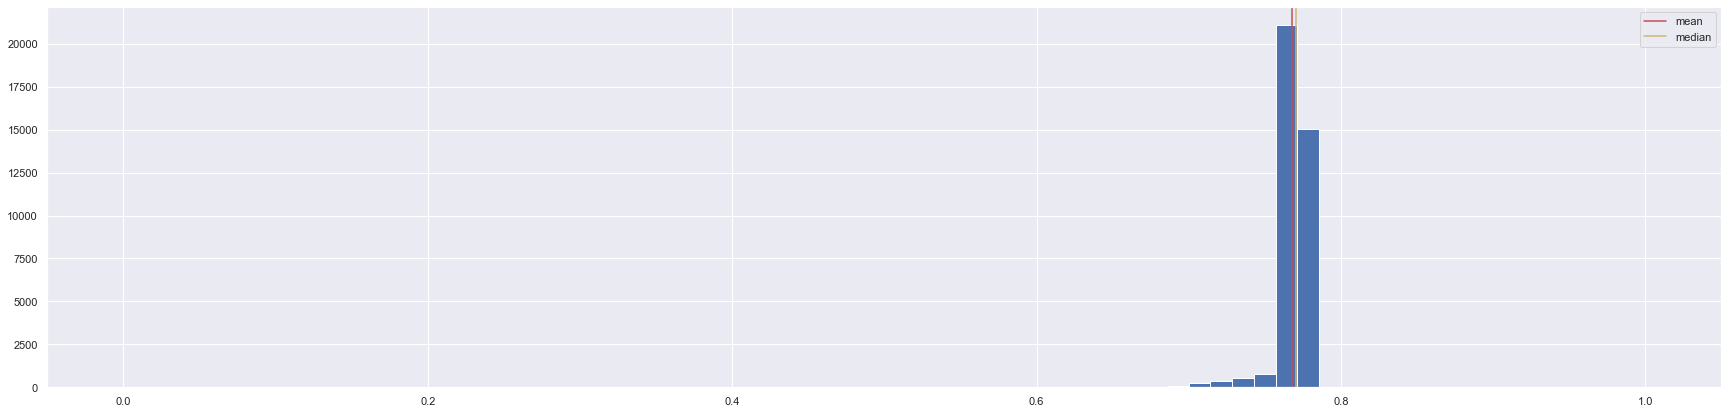

In [522]:
print('Mean = ', df1['year_scaled'].mean())
print('Median = ', df1['year_scaled'].median())
plt.hist(df1['year_scaled'], bins=70);
plt.axvline(df1['year_scaled'].mean(), color='r', label = "mean")
plt.axvline(df1['year_scaled'].median(), color='y', label = "median")
plt.legend()
plt.show()

Taking a look into the results above, where the <i>mean</i> and <i>median</i> are quite equal, I decided to substitute the NaN values with the <b>mean</b> value.

#### Handling NaN values

In [523]:
df1["year_scaled"].fillna(df1['year_scaled'].mean(), inplace = True) 
# # here we substitute too, in order to use these data in prediction and to compare the results
# df1["year"].fillna(df1['year'].mean(), inplace = True) 
df1.isnull().sum()

name             0
id               0
nametype         0
recclass         0
mass           119
fall             0
year           175
reclat           0
reclong          0
GeoLocation      0
year_scaled      0
dtype: int64

#### Outliers

In [524]:
df_with_outliers = df1.copy()

In [525]:
print('Number of rows before Isolation Forest = ', df1.shape[0])

Number of rows before Isolation Forest =  38401


In [526]:
year_with_outliers = df1['year_scaled']

In [527]:
from sklearn.ensemble import IsolationForest
model=IsolationForest()
df1['iso']=pd.Series(model.fit_predict(df1[['year_scaled']].values))
df1=df1[df1.iso!=-1]
df2=df1.drop(['iso'], axis=1)

In [528]:
print('Number of rows after Isolation Forest = ', df2.shape[0])

Number of rows after Isolation Forest =  32416


Text(0.5, 1.0, 'Year Scaled without Outliers')

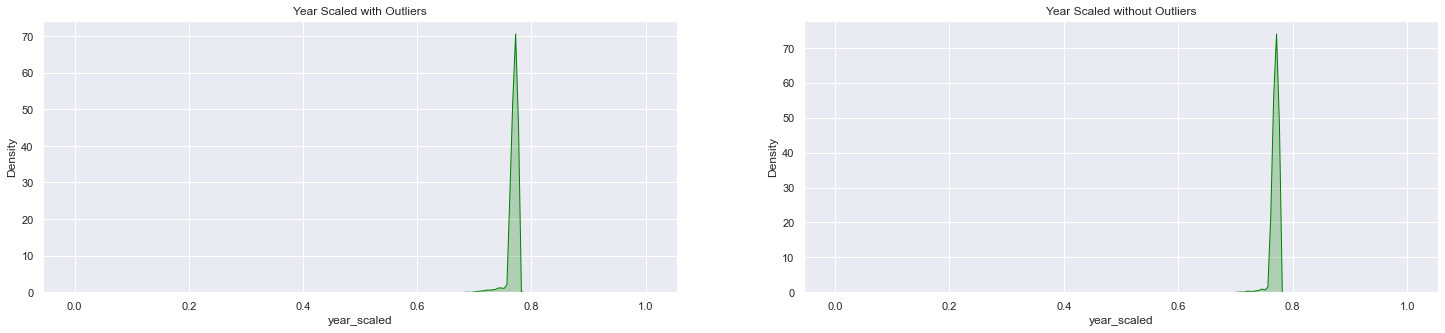

In [529]:
fig = plt.figure(figsize=(25,5))

fig.add_subplot(1,2,1)
sns.kdeplot(year_with_outliers,fill=True, color = 'Green')
plt.title('Year Scaled with Outliers')

fig.add_subplot(1,2,2)
sns.kdeplot(df2['year_scaled'],fill=True, color = 'Green')
plt.title('Year Scaled without Outliers')

Well, maybe in the graph it doesn't seem that there were deleted around 4532 rows, but for sure this step will give us a better performance when we will train our model.

### Mass column

The <b>'mass'</b> column describes the mass of the meteorite.

In [530]:
df2['mass'].describe()

count    3.233100e+04
mean     1.221010e+04
std      5.665142e+05
min      0.000000e+00
25%      6.085000e+00
50%      2.560000e+01
75%      1.500000e+02
max      6.000000e+07
Name: mass, dtype: float64

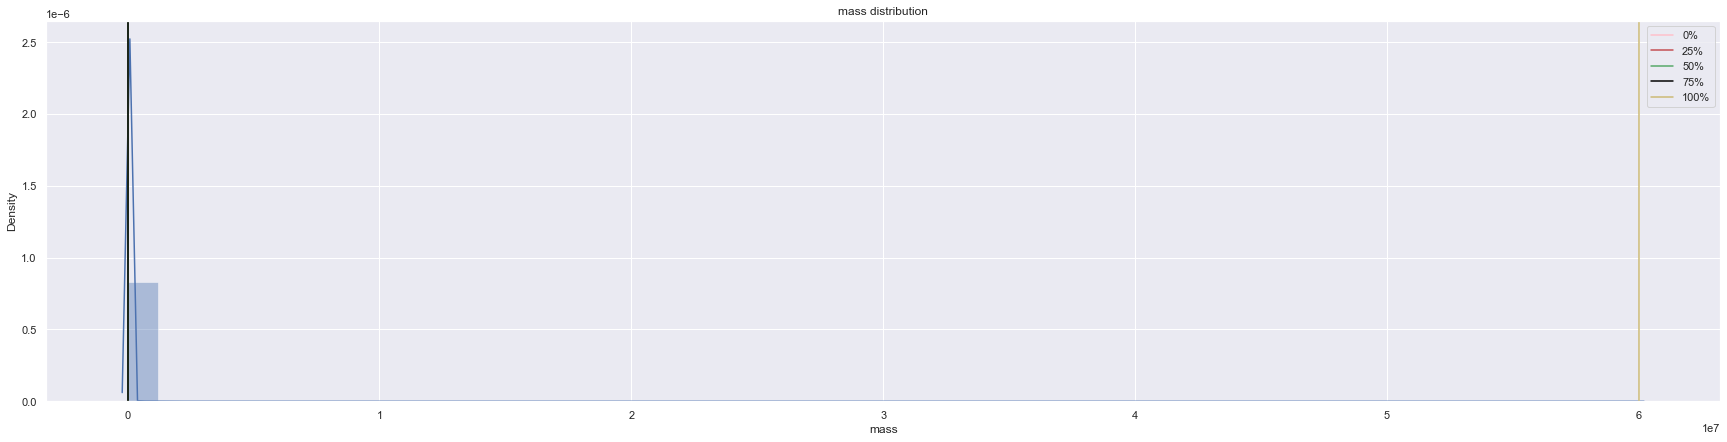

In [531]:
sns.set(rc={"figure.figsize":(30, 7)}) #width=30, height=7
sns.distplot(df2.mass)
plot_lines(0, 6.200000e+00, 2.587000e+01, 1.521400e+02, 6.000000e+07)
plt.title('mass distribution');

The distribution seems like a logarithmic one, the bigger the mass, the smaller the number of meteorites. <br>
For a better visualization of quartiles, let's do so:

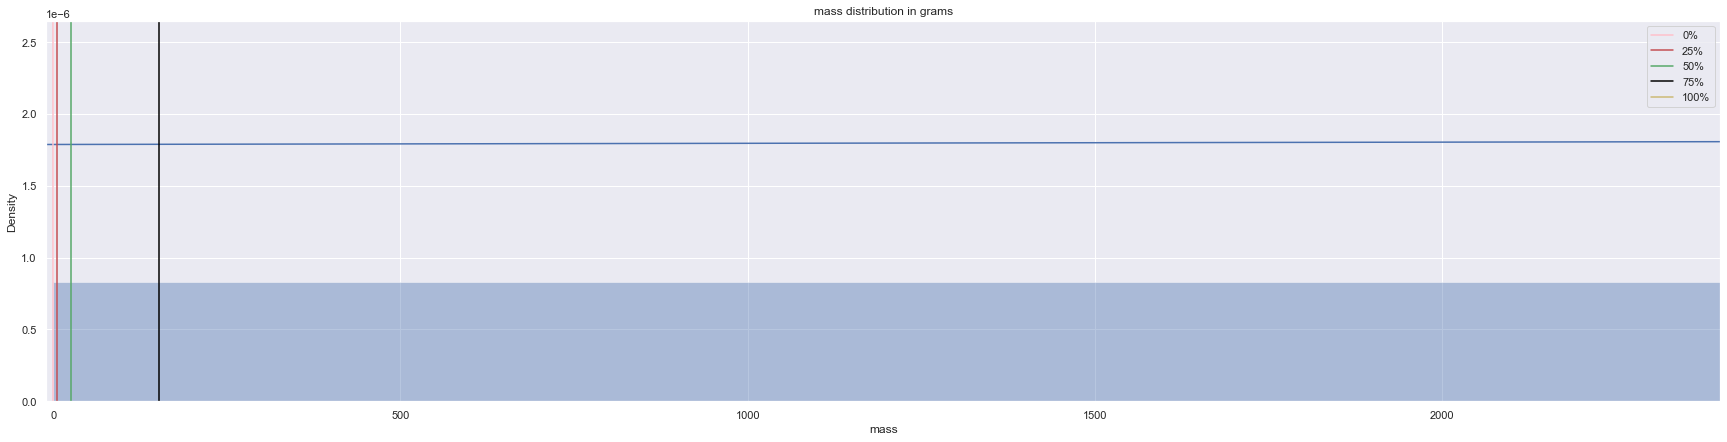

In [532]:
sns.set(rc={"figure.figsize":(30, 7)}) #width=30, height=7
sns.distplot(df2.mass)
plot_lines(0, 6.200000e+00, 2.587000e+01, 1.521400e+02, 6.000000e+07)
plt.xlim(-10,2400)
plt.title('mass distribution in grams');

The blue line is the distribution conturing. Well, here we have a big number of meteorites with small mases, and only few of some kilograms. This is suggested by the quartiles. The first (pink), the second (red) and the third (green) are very close to each other, whereas the 4th qurtile (black) is bit dinstant, and the 5th is very distant. This situation may show us that we have outliers. Let's analyse it.

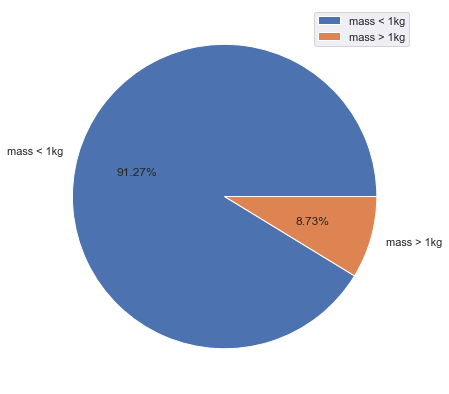

In [533]:
mass1 = df2.loc[df2['mass'] < 1000]
mass2 = df2.loc[df2['mass'] >= 1000]

prc1 = mass1.shape[0]/df2.shape[0]
prc2 = mass2.shape[0]/df2.shape[0]

data = [prc1, prc2]
lbl = ['mass < 1kg', 'mass > 1kg']
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = lbl, autopct='%1.2f%%')
plt.legend()
plt.show()

Interesting observation, in our dataset we have around 91.27% of small meteorites (mass < 1kg).

In [537]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df2['mass_scaled'] = min_max.fit_transform(df2[['mass']])
df_with_outliers['mass_scaled'] = min_max.fit_transform(df_with_outliers[['mass']])

In [535]:
# from sklearn.preprocessing import QuantileTransformer
# trans = QuantileTransformer(output_distribution="normal")
# df2['mass_scaled'] = trans.fit_transform(df2[['mass']])

Text(0.5, 1.0, 'Mass Scaled')

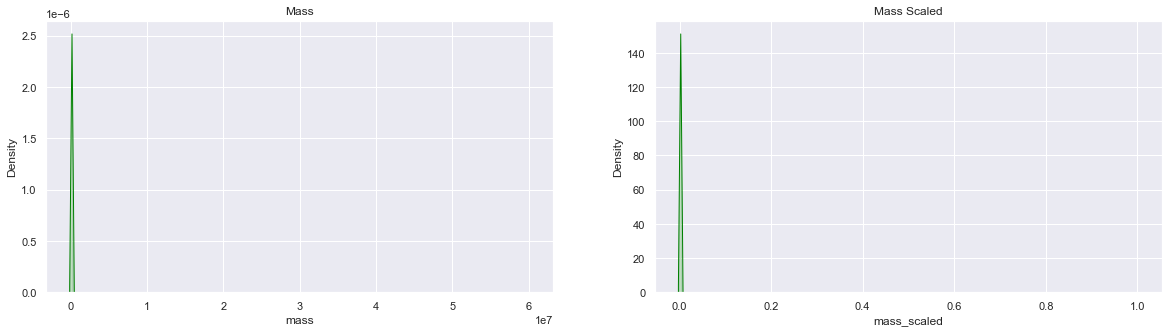

In [538]:
fig = plt.figure(figsize=(20,5))

fig.add_subplot(1,2,1)
sns.kdeplot(df2['mass'],fill=True, color = 'Green')
plt.title('Mass')

fig.add_subplot(1,2,2)
sns.kdeplot(df2['mass_scaled'],fill=True, color = 'Green')
plt.title('Mass Scaled')

Mean =  0.00020350167847782828
Median =  4.266666666666667e-07


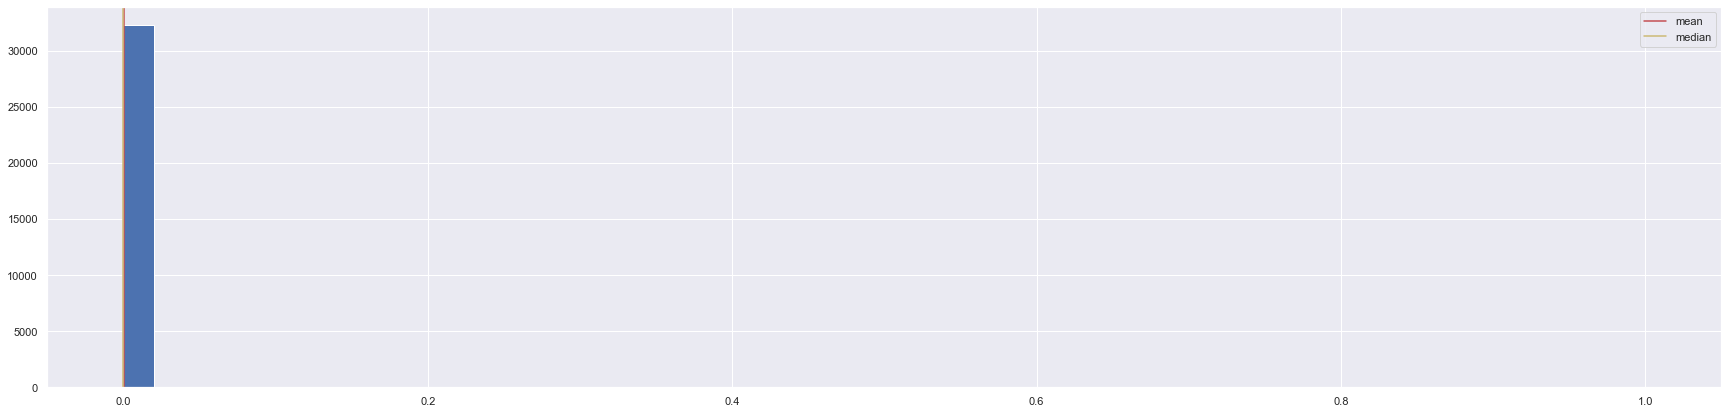

In [539]:
print('Mean = ', df2['mass_scaled'].mean())
print('Median = ', df2['mass_scaled'].median())
plt.hist(df2['mass_scaled'], bins=50);
plt.axvline(df2['mass_scaled'].mean(), color='r', label = "mean")
plt.axvline(df2['mass_scaled'].median(), color='y', label = "median")
plt.legend()
plt.show()

In [540]:
df2["mass_scaled"].fillna(df2['mass_scaled'].median(), inplace = True) 
df_with_outliers["mass_scaled"].fillna(df_with_outliers['mass_scaled'].median(), inplace = True) 

# df2["mass"].fillna(df2['mass'].median(), inplace = True) 
df2.isnull().sum()

name             0
id               0
nametype         0
recclass         0
mass            85
fall             0
year           158
reclat           0
reclong          0
GeoLocation      0
year_scaled      0
mass_scaled      0
dtype: int64

#### Outliers

In [541]:
print('Number of rows before Isolation Forest = ', df2.shape[0])
mass_with_outliers = df2['mass_scaled']

Number of rows before Isolation Forest =  32416


In [542]:
from sklearn.ensemble import IsolationForest
model=IsolationForest()
df2['iso']=pd.Series(model.fit_predict(df2[['mass_scaled']].values))
df2=df2[df2.iso!=-1]
df3=df2.drop(['iso'], axis=1)

In [543]:
print('Number of rows after LocalOutlierFactor = ', df3.shape[0])

Number of rows after LocalOutlierFactor =  30784


Text(0.5, 1.0, 'Mass Scaled without Outliers')

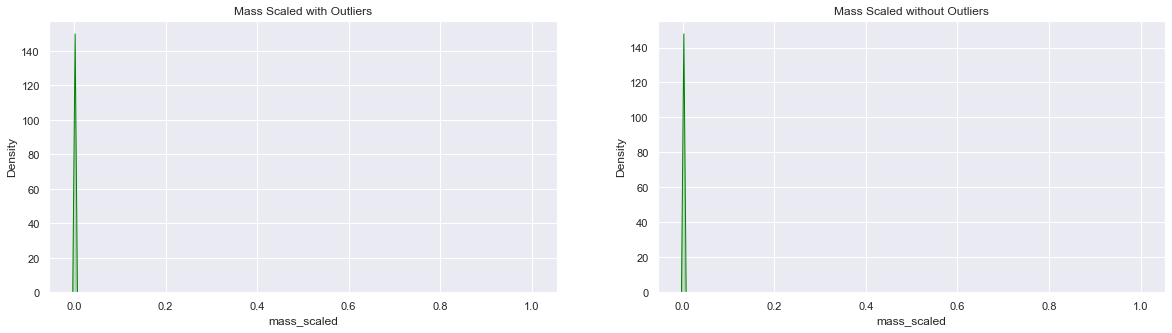

In [544]:
fig = plt.figure(figsize=(20,5))

fig.add_subplot(1,2,1)
sns.kdeplot(mass_with_outliers,fill=True, color = 'Green')
# plt.xlim(-0.02, 0.01)
plt.title('Mass Scaled with Outliers')

fig.add_subplot(1,2,2)
sns.kdeplot(df3['mass_scaled'],fill=True, color = 'Green')
# plt.xlim(-0.02, 0.01)
plt.title('Mass Scaled without Outliers')

<AxesSubplot:xlabel='year', ylabel='mass'>

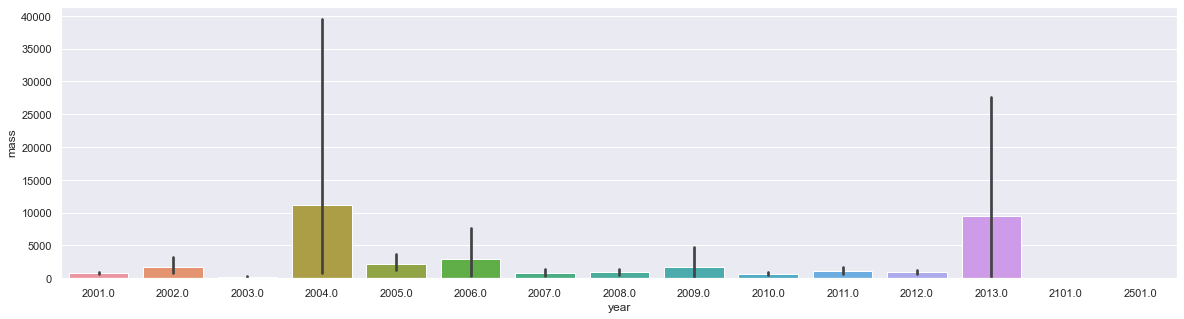

In [545]:
df_20 = df3[df3['year']>2000]
fig = plt.figure(figsize=(20,5))
sns.barplot(x=df_20['year'],y=df_20['mass'])

In the figure above we can see the relation between masses and years of meteorite landing. Well, in 2004 was the heaviest mass of meteorites that landed on Earth.

### nametype column

The <b>'nametype'</b> column gives us the information if the landed meteorite had meteoritical composition upon discovery after leading (i.e. <b>Valid</b>) or its meteoritical composition decomposed upon discovery (i.e. <b>Relict</b>).

In [546]:
df3['nametype'].value_counts()[1]

67

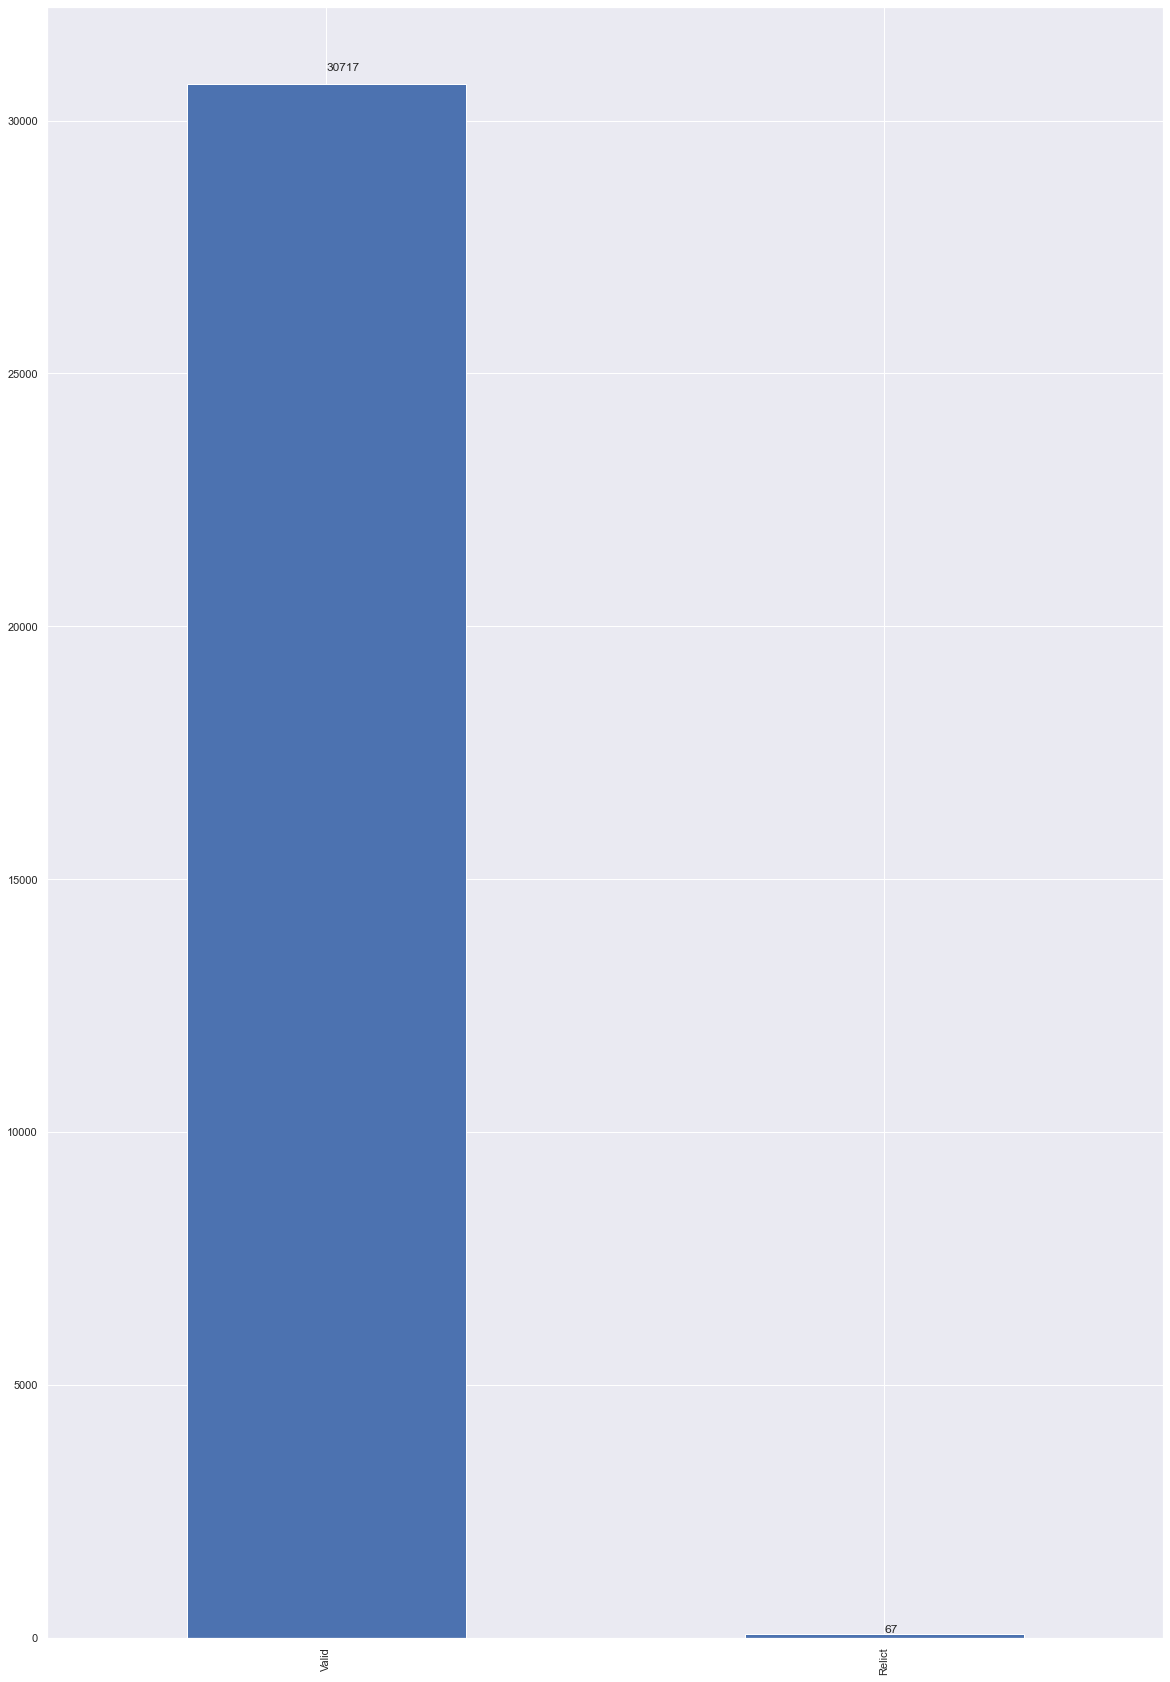

In [547]:
fig = plt.figure(figsize=(20,30))
df3['nametype'].value_counts().plot(kind='bar')
plt.annotate(df3['nametype'].value_counts()[0],xy=(0,31000))
plt.annotate(df3['nametype'].value_counts()[1],xy=(1,100))
plt.show()

As it can be seen in the plot above, we have only 67 relict meteorites, which means that these meteorites' composition has decomposed until descovery. I have some assumptions about these meteorites, but I will explain them lates, when we will analyse the <b>fall</b> column.

### fall column

The <b>'fall'</b> column classifies if the meteorite was noticed when it was falling (i.e. <b>Fall</b>), or it was <b>Found</b>.

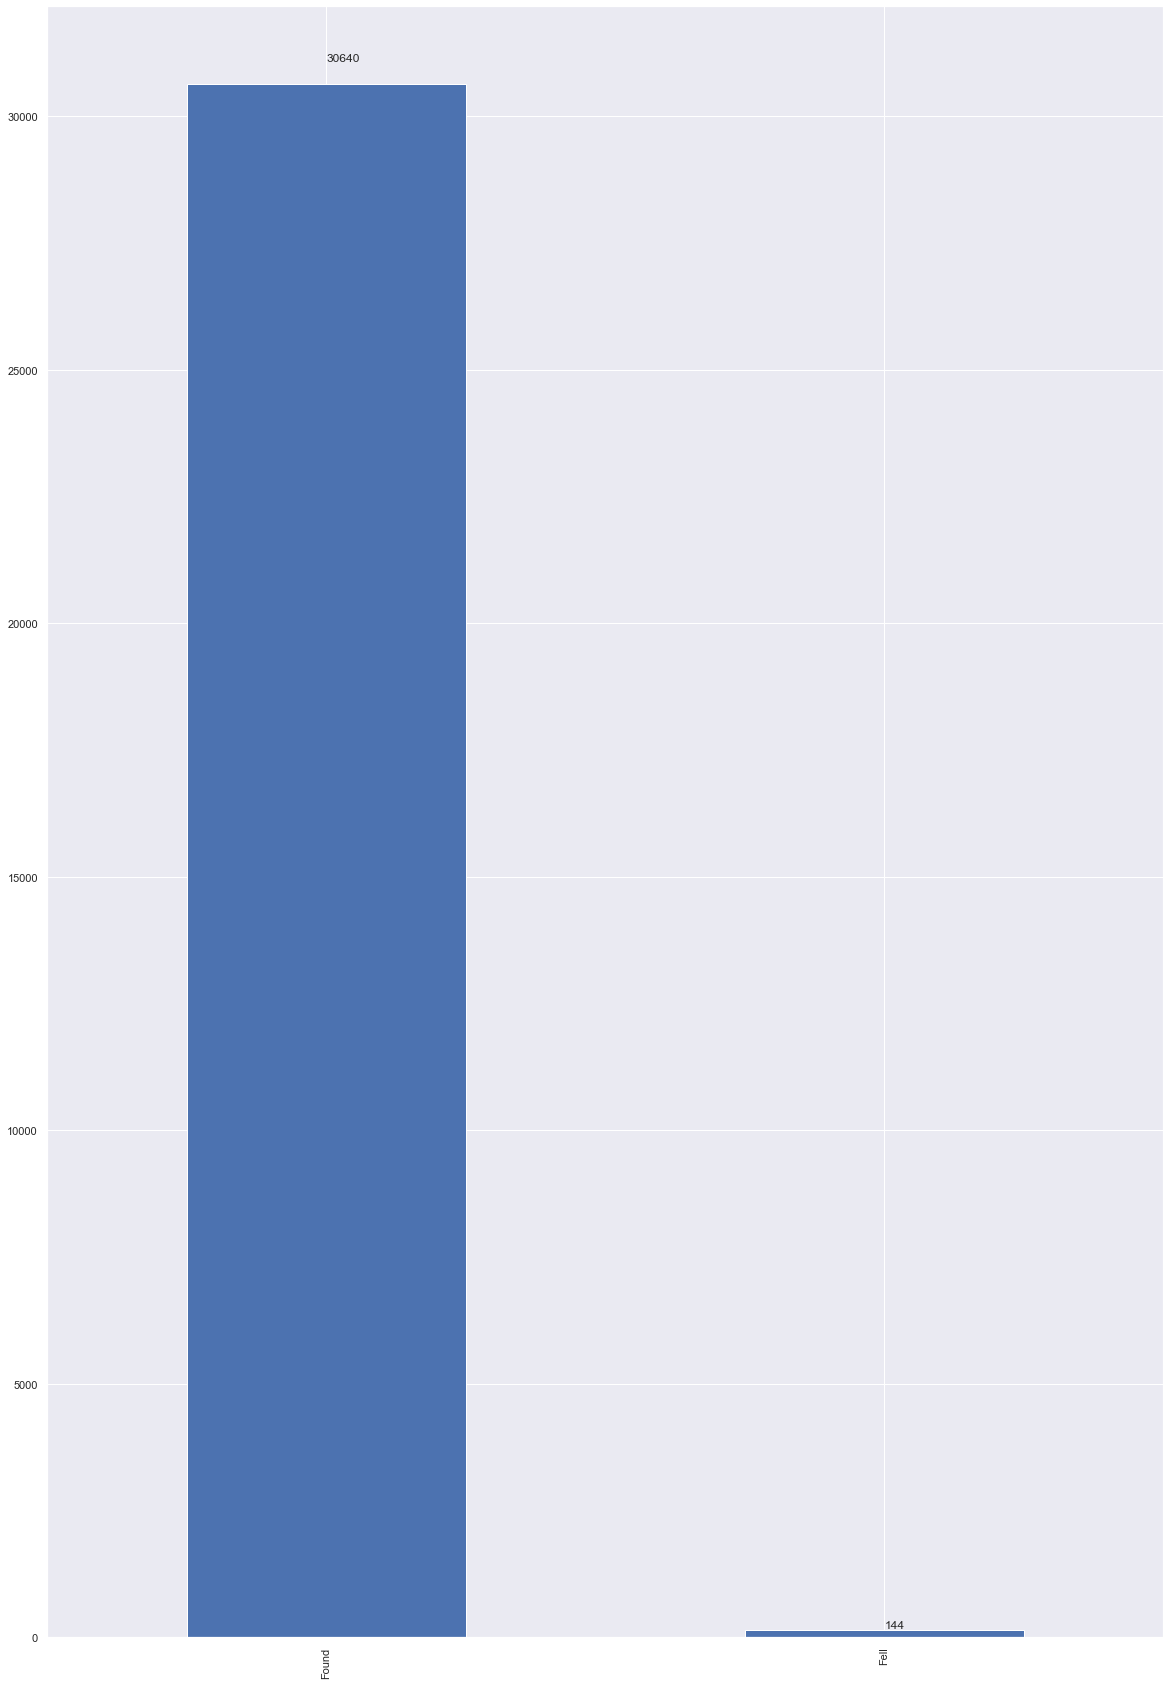

In [551]:
fig = plt.figure(figsize=(20,30))
df3['fall'].value_counts().plot(kind='bar')
plt.annotate(df3['fall'].value_counts()[0],xy=(0,31100))
plt.annotate(df3['fall'].value_counts()[1],xy=(1,170))
plt.show()

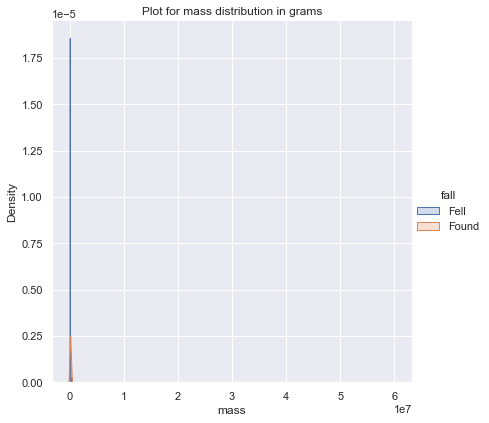

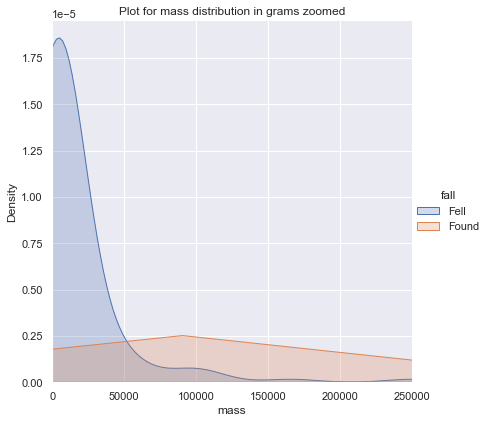

In [552]:
sns.FacetGrid(df3, hue="fall", height=6,).map(sns.kdeplot, "mass",shade=True).add_legend()
plt.title('Plot for mass distribution in grams')

sns.FacetGrid(df3, hue="fall", height=6,).map(sns.kdeplot, "mass",shade=True).add_legend()
plt.xlim(-10, 250000)
plt.title('Plot for mass distribution in grams zoomed')
plt.show()

If we take a look in the plot above, we can see that the biggest number of meteorites that were seen falling, had a weight less than <b>50 kg</b>, whereas the ones that were found were heavier. 

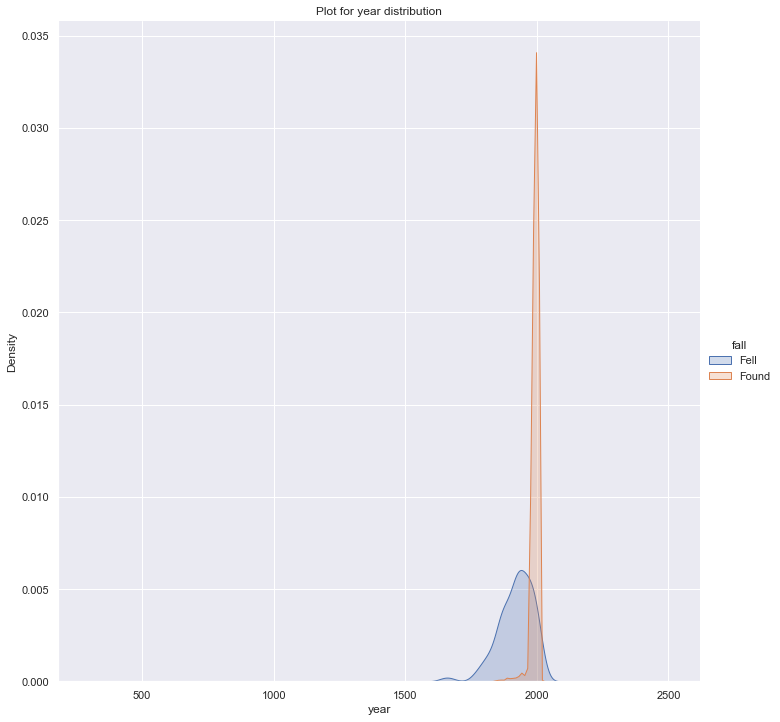

In [553]:
sns.FacetGrid(df3, hue="fall", height=10,).map(sns.kdeplot, "year",shade=True).add_legend()
plt.title('Plot for year distribution')
plt.show()

Most of the meteorites found are from the last decades. It can be seen how the records for <b>Fell</b> meteorite landings increased up until 2000 and meanwhile the meteorites taht were <b>Found</b> increased much more in a short period of time. 

### recclass column

The <b>'recclass'</b> column describes the class of the meteorite (i.e. their chemical, physiscal composition). A useful link is: https://en.wikipedia.org/wiki/Meteorite_classification

In [554]:
len(df3['recclass'].unique())

386

In [555]:
classes = df3['recclass'].value_counts()
classes

L6                6139
H5                4939
H4                3444
H6                3095
L5                2372
                  ... 
Mesosiderite-B       1
LL3/4                1
H3.7-6               1
L(LL)3.05            1
Mesosiderite-C       1
Name: recclass, Length: 386, dtype: int64

Let us see the distribution of values in these recclass.

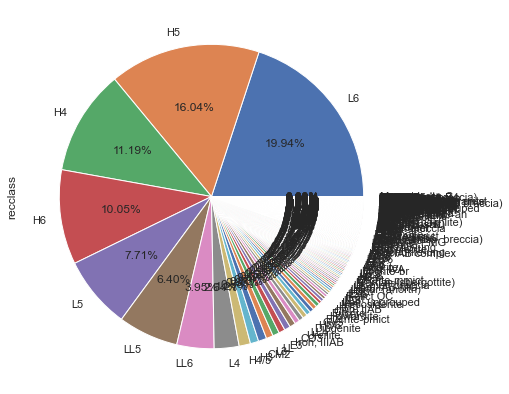

In [556]:
classes.plot.pie(autopct='%.2f%%')
plt.show()

It looks very messy, and as it can be seen, we have a common pattern, either the class starts with 'H', or with 'L' or with 'LL' or other options. From my point of view, we can group the classes by using the link above from the wikipedia. Well, wikipedia says that there is <i>Ordinary chondrite class</i>, which contains:
<ul>
    <li>H chondrite group</li>
    <li>L chondrite group</li>
    <li>LL chondrite group</li>
</ul>
Therefore, after looking through all the record from the df, I decided to take these 3 groups as the main ones and the reest to classify as 'Others'.

In [557]:
df4 = df3.copy()
for x in df3['recclass']:
    y = x.split(' ')
    if 'LL' in y[0]:
        df4.recclass.replace(to_replace=x, value='LL', inplace=True)
        df_with_outliers.recclass.replace(to_replace=x, value='LL', inplace=True)
    
    elif 'L' in y[0] and 'LL' not in y and y[0] != 'Lunar' and 'Lodranite' not in y:
        df4.recclass.replace(to_replace=x, value='L', inplace=True)
        df_with_outliers.recclass.replace(to_replace=x, value='L', inplace=True)

    
    elif 'H' in y[0] and y[0] != 'Howardite':
        df4.recclass.replace(to_replace=x, value='H', inplace=True)
        df_with_outliers.recclass.replace(to_replace=x, value='H', inplace=True)

    else:
        df4.recclass.replace(to_replace=x, value='Others', inplace=True)
        df_with_outliers.recclass.replace(to_replace=x, value='Others', inplace=True)


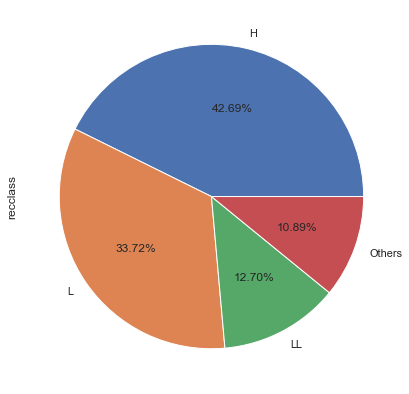

In [452]:
df4['recclass'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

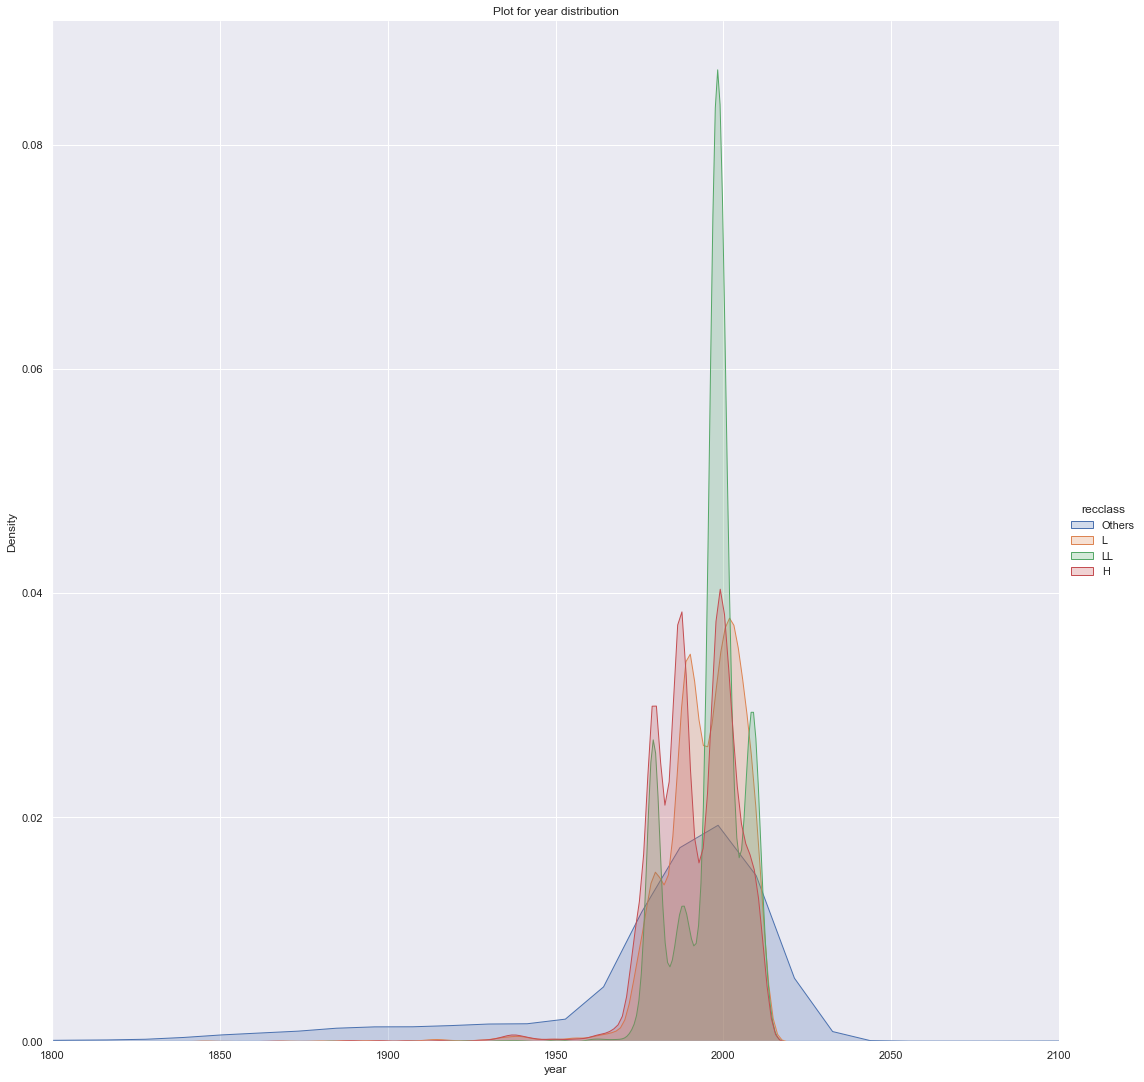

In [558]:
g = sns.FacetGrid(df4, hue="recclass", height=15).map(sns.kdeplot, "year",shade=True).add_legend()
g.set(xlim=(1800, 2100))
plt.title('Plot for year distribution')
plt.show()

Another conclusion: The <b>LL chondrites</b> (group of stony meteorites), are the most frequent class that has been recorded in the last decades, in comparison to <b>H chondrites</b>, which are on the second place, or <b>L chndrite</b>, being on the 3rd place.

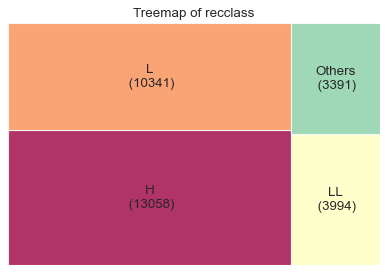

In [561]:
import squarify 
# Prepare the data
df_recclass = df4.groupby('recclass').size().reset_index(name='counts')
labels = df_recclass.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df_recclass['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(6, 4), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of recclass')
plt.axis('off')
plt.show()

### name column

The <b>'name'</b> column contains the name of the meteorite.

In [562]:
df4['name'].describe()

count       30784
unique      30784
top       Akyumak
freq            1
Name: name, dtype: object

Well, as it can be seen, we have 30915 unique names (not surprising). This column will be dropped, as it won't give us nothing for predictions.

In [563]:
df4.drop('name', axis=1, inplace=True)
df_with_outliers.drop('name', axis=1, inplace=True)

### id column

The <b>'id'</b> column identifies the meteorite landing.

In [564]:
df4['id'].nunique()

30784

Not much to say about it. We will drop this column, too.

In [565]:
df4.drop('id', axis=1, inplace=True)
df_with_outliers.drop('id', axis=1, inplace=True)

In [566]:
# drop the columns with NaN values
df4.drop(['year', 'mass'], axis=1, inplace=True)
df_with_outliers.drop(['year', 'mass'], axis=1, inplace=True)

### Handling categorical data

My df has 3 columns with categorical data, therefore I decided that the columns <b>'fall'</b> and <b>'nametype'</b> will be substituded with <b>One Hot Encoding</b> as they have only two categories and it will be easier to represent those data in this way. <br>
The values from <b>'recclass'</b> column will be replaced using <b>Label Encoding</b>.

In [567]:
df5 = pd.get_dummies(df4, columns=['fall', 'nametype'], drop_first=True)
df_with_outliers = pd.get_dummies(df_with_outliers, columns=['fall', 'nametype'], drop_first=True)

In [58]:
from imperio import FrequencyImputationTransformer
freq = FrequencyImputationTransformer(index=[0])
# wanted to use it, but failed :(

ModuleNotFoundError: No module named 'imperio'

In [568]:
df5['recclass'] = df5['recclass'].astype('category')
df_with_outliers['recclass'] = df_with_outliers['recclass'].astype('category')

df5['recclass_cat'] = df5['recclass'].cat.codes
df_with_outliers['recclass_cat'] = df_with_outliers['recclass'].cat.codes

df5.tail()

,recclass,reclat,reclong,GeoLocation,year_scaled,mass_scaled,fall_Found,nametype_Valid,recclass_cat
45711,Others,29.03700,17.01850,"(29.037000, 17.018500)",0.767727,2.866667e-06,1,1,3
45712,Others,13.78333,8.96667,"(13.783330, 8.966670)",0.771818,7.666667e-07,1,1,3
45713,H,49.25000,17.66667,"(49.250000, 17.666670)",0.744545,5.500000e-08,1,1,0
45714,L,49.78917,41.50460,"(49.789170, 41.504600)",0.773636,3.611667e-05,1,1,1
45715,L,33.98333,-115.68333,"(33.983330, -115.683330)",0.761364,3.333333e-06,1,1,1


In [569]:
df5.drop('recclass', axis=1, inplace=True)
df_with_outliers.drop('recclass', axis=1, inplace=True)

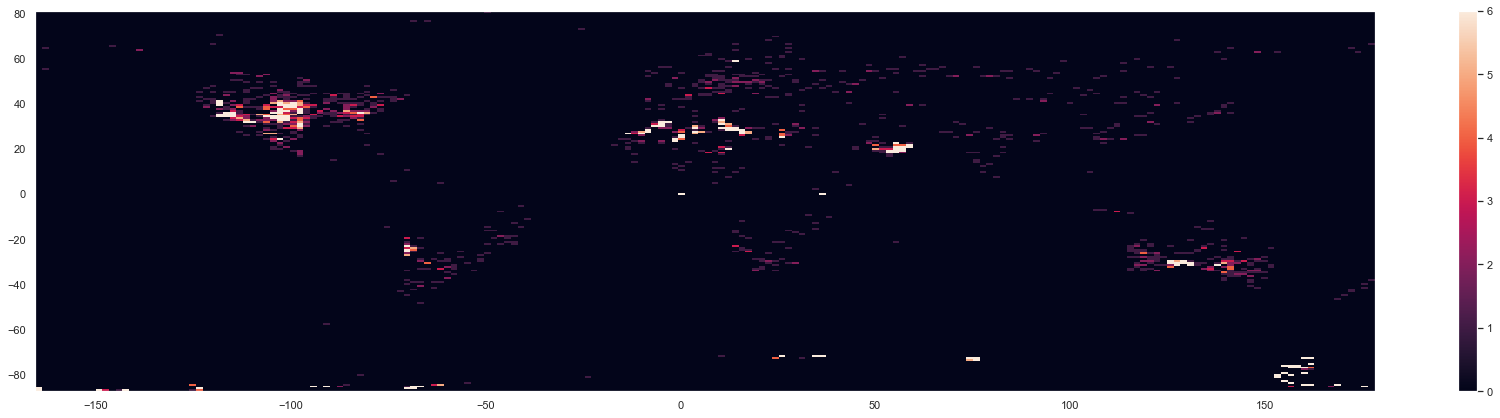

In [571]:
plt.hist2d(df5.reclong, df5.reclat, bins=200, vmax=6)
plt.grid(False)
plt.colorbar();

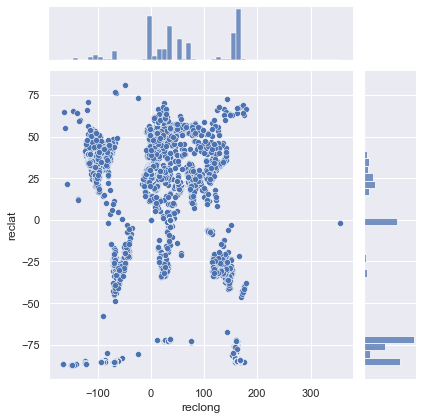

In [572]:
sns.jointplot(data=df, x="reclong", y="reclat");

Another map with places where meteorites have landed, I wasn't able to plot, as the 'geopandas' and 'Shapely' libraries fail to install, same as 'imperio'. <br>
 Now, we finished with cleaning the data, let's move next.

#### Correlation

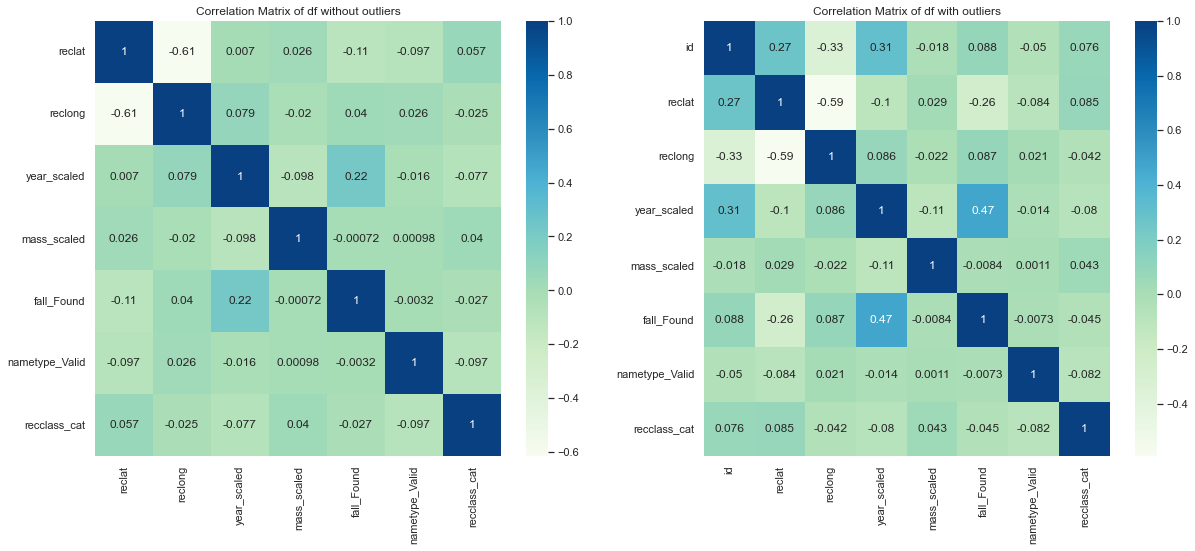

In [573]:
# correlation using heatmap
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.heatmap(df5.corr(), annot = True, cmap='GnBu')
plt.title('Correlation Matrix of df without outliers')

plt.subplot(1,2,2)
sns.heatmap(df_without_outliers.corr(), annot = True, cmap='GnBu')
plt.title('Correlation Matrix of df with outliers')

plt.show()

### Predictions

For making predictions on the coordinates, I used <b>Linear Regression</b>, <b>Decission Tree Regressor</b> and <b>Random Forest Regressor</b>.

#### Test the data without outliers

In [583]:
from sklearn.model_selection import train_test_split
X = df5.drop(['reclat', 'reclong', 'GeoLocation'], axis = 1)
y = df5[['reclat', 'reclong']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression

In [584]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred=lr.predict(X_test)

In [585]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 53.42868225303887
MSE: 4017.4877990635423
RMSE: 63.38365561454737


In order to see if our model is good, is not enough to look at the metrics above.

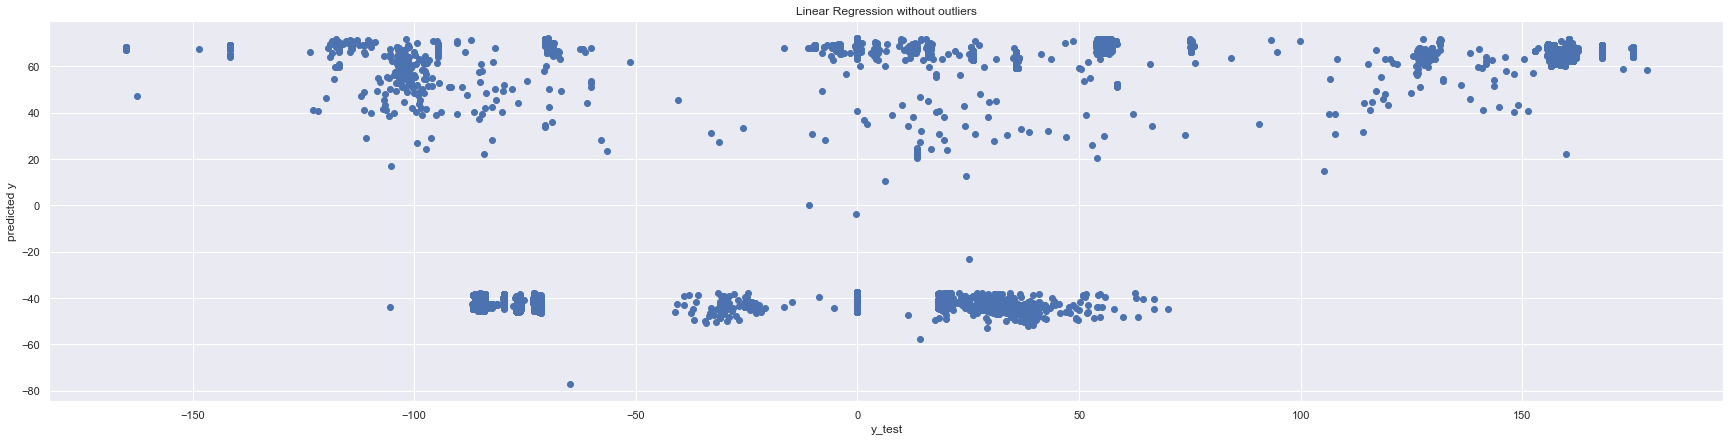

In [586]:
plt.scatter(x=y_test, y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title('Linear Regression without outliers')
plt.show()

As it can be seen, we do not really have a stright line in this scatter plot.

#### Decision Tree Regressor

In [587]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)

In [588]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 25.413923120537888
MSE: 2297.707393096607
RMSE: 47.93440719458839


Here we have already better metrics. Let us see the plot:

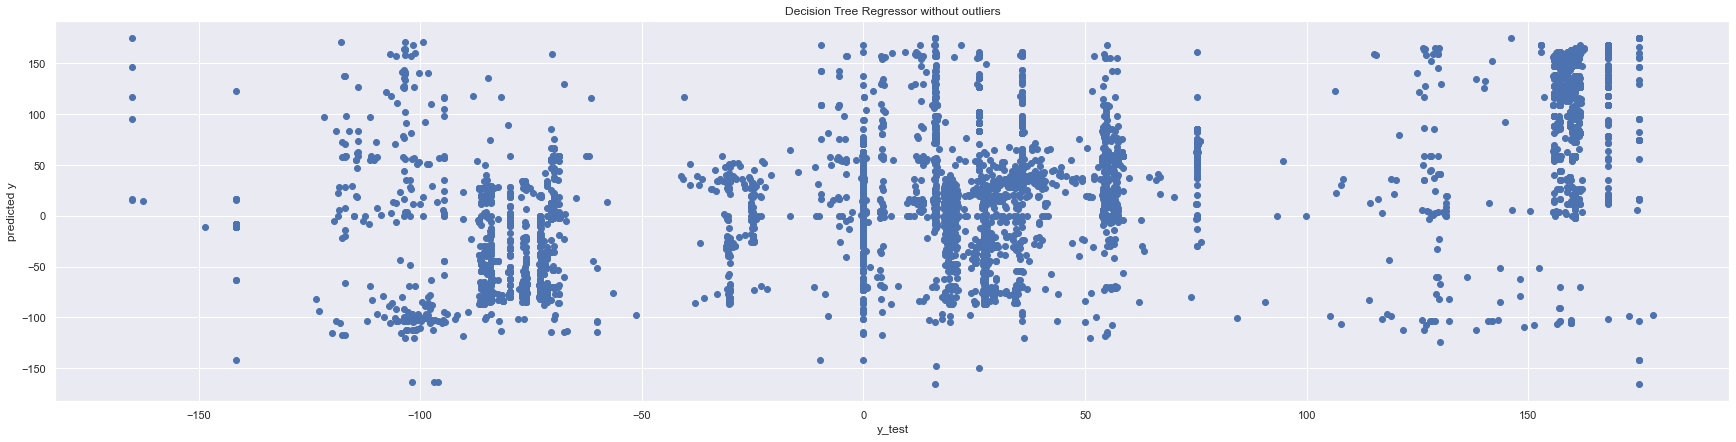

In [589]:
plt.scatter(x=y_test, y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title('Decision Tree Regressor without outliers')
plt.show()

Bit confusing all these dots, but some lines appeared on our plot.

#### Random Forest Regressor

In [590]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train, y_train)
pred = rdr.predict(X_test)

In [591]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 24.268787181042995
MSE: 1885.4302865083366
RMSE: 43.42154173343384


Now, we really got better results and the plot below also looks bit better than in Decision Tree Regressor.

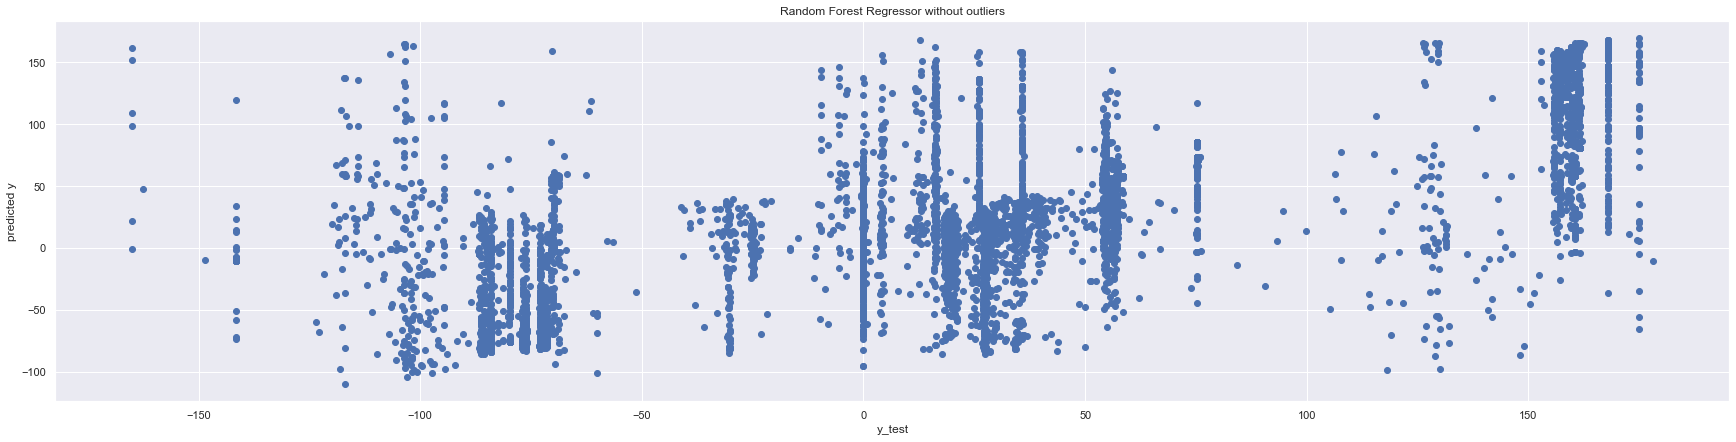

In [592]:
plt.scatter(x=y_test, y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title('Random Forest Regressor without outliers')
plt.show()

In comparison to Linear Regression and Decision Tree Regression, we have a better representation of the "stright lines" and RMSE is lower for RandomForestRegressor.

#### Test the df with outliers

In [593]:
X = df_with_outliers.drop(['reclat', 'reclong', 'GeoLocation'], axis = 1)
y = df_with_outliers[['reclat', 'reclong']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Linear Regression

In [594]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred=lr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 54.81421629281729
MSE: 4261.396097178062
RMSE: 65.27936961382257


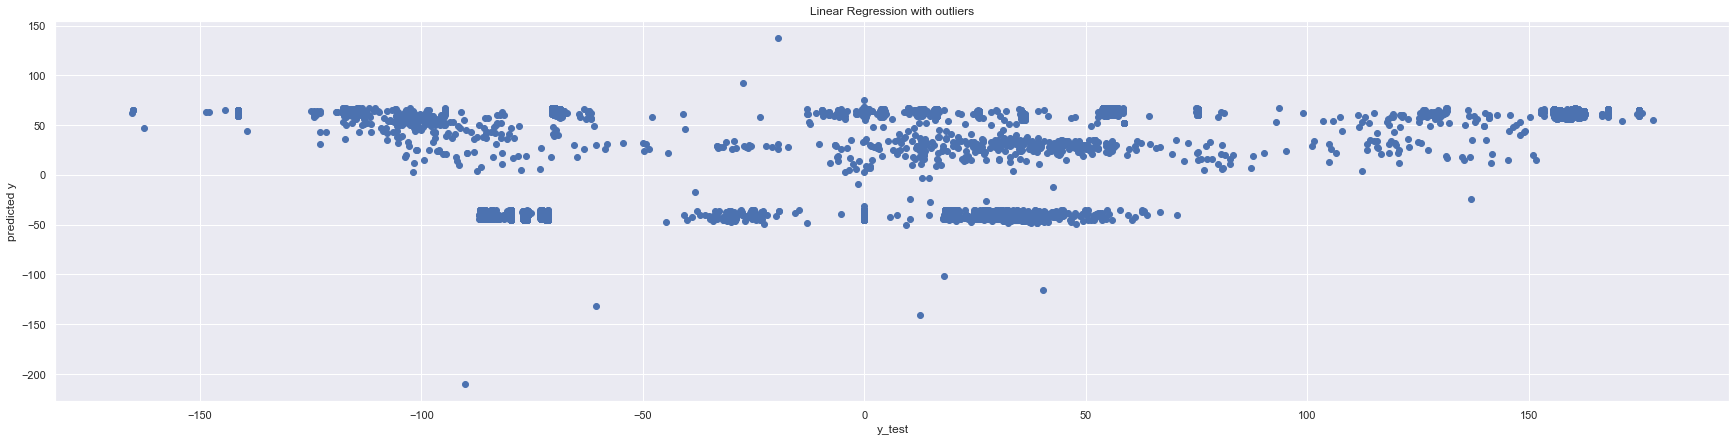

In [595]:
plt.scatter(x=y_test, y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title('Linear Regression with outliers')
plt.show()

In comparison with the errors on the df without outliers, the errors above are bigger.

#### Decision Tree Regressor

In [596]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
pred = dtr.predict(X_test)

In [597]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 27.52755572530282
MSE: 2493.2336728475484
RMSE: 49.93229088323055


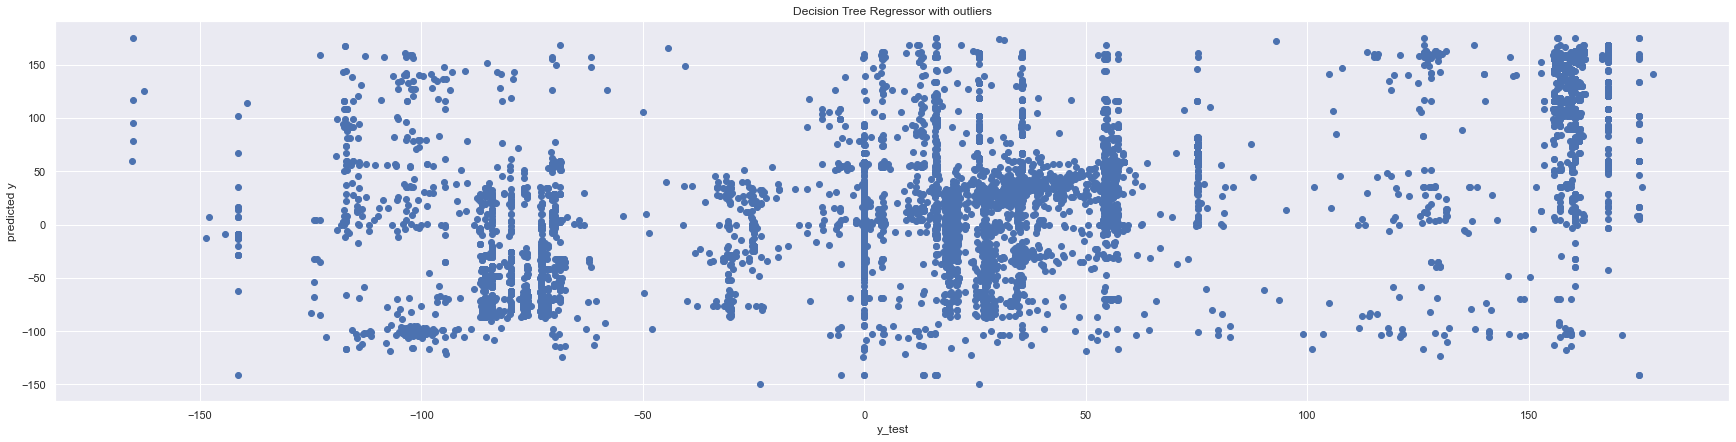

In [598]:
plt.scatter(x=y_test, y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title('Decision Tree Regressor with outliers')
plt.show()

Bit bigger the error, but look at the graph, a <b>line</b> can be seen (not obvious, but has a shape).

#### Random Forest Regressor

In [599]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train, y_train)
pred = rdr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 25.684915241027618
MSE: 1965.896289116783
RMSE: 44.338429033027126


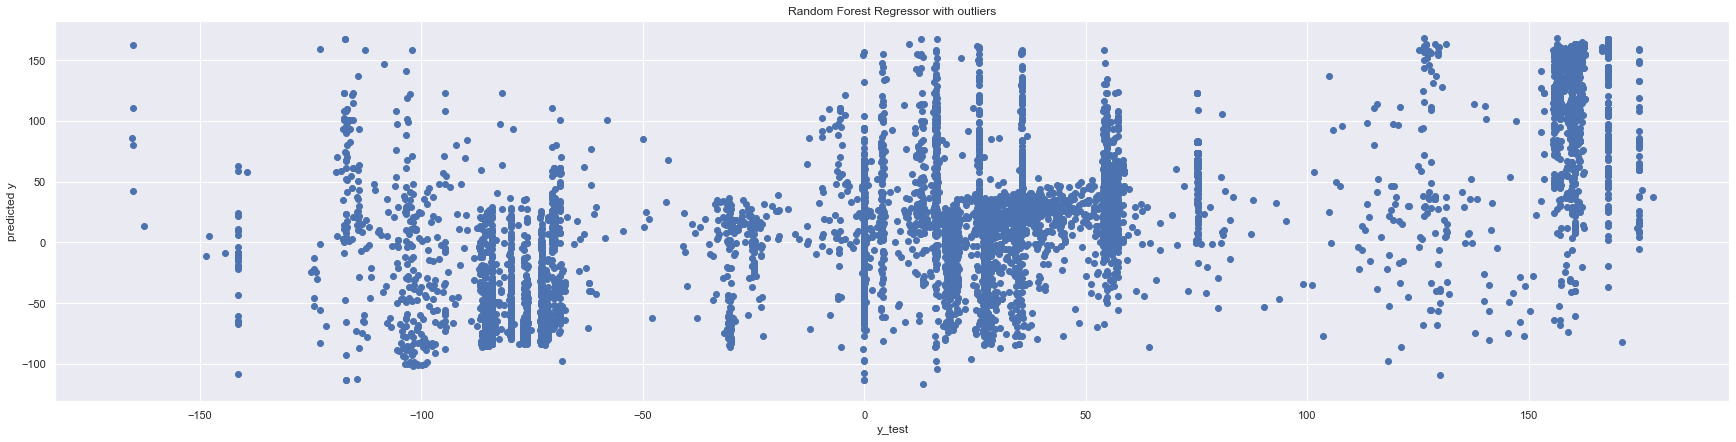

In [600]:
plt.scatter(x=y_test, y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title('Random Forest Regressor with outliers')
plt.show()

So, even if the errors are bit larger, than in the dataset without outliers, look at the graphs, they look much better, even the 'lines' can be seen better, which means that I'm on the right way.

#### Last one, Feature Selection

In [601]:
df6=df5.copy()

In [602]:
df5 = df5.drop('GeoLocation', axis = 1)

In [603]:
df_with_outliers2 = df_with_outliers.copy()
df_with_outliers = df_with_outliers.drop('GeoLocation', axis = 1)

#### df without outliers

##### LDA Reducer

In [604]:
from kydavra import LDAReducer
lda = LDAReducer()
selected_columns1 = lda.reduce(df5, 'reclong')
selected_columns1.columns

Index(['reclat', 'reclong', 'year_scaled', 'mass_scaled', 'fall_Found',
       'nametype_Valid', 'recclass_cat'],
      dtype='object')

In [605]:
lda = LDAReducer()
selected_columns2 = lda.reduce(df5, 'reclat')
selected_columns2.columns

Index(['reclat', 'reclong', 'year_scaled', 'mass_scaled', 'fall_Found',
       'nametype_Valid', 'recclass_cat'],
      dtype='object')

Because the columns are the same, we use one of two variants.

In [606]:
X = selected_columns1.drop(['reclat', 'reclong'], axis = 1)
y = df5[['reclat', 'reclong']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [607]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train, y_train)
pred = rdr.predict(X_test)

In [608]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 24.30426332287795
MSE: 1892.5380074979207
RMSE: 43.50331030505519


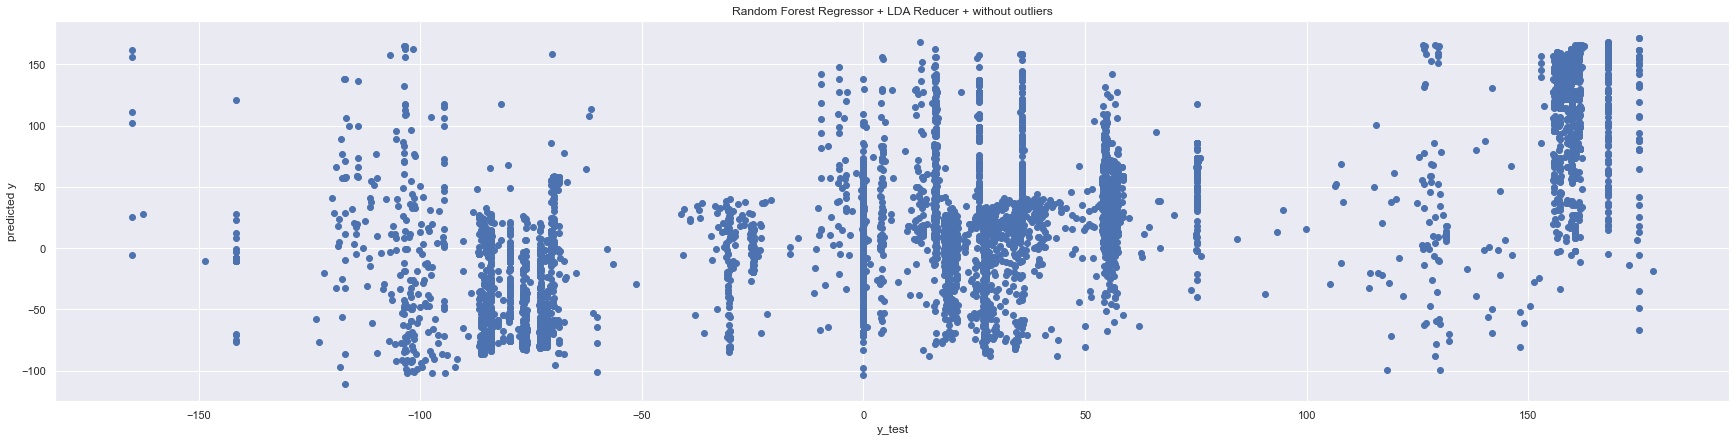

In [609]:
plt.scatter(x=y_test, y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title('Random Forest Regressor + LDA Reducer + without outliers')
plt.show()

Not a bat graph and not a bad error.

##### Point Biserial Correlation Selcetor

In [610]:
from kydavra import PointBiserialCorrSelector
point_biseral = PointBiserialCorrSelector()
selected_cols1 = point_biseral.select(df5, 'reclong')
selected_cols1

['reclat', 'year_scaled', 'mass_scaled']

In [611]:
point_biseral = PointBiserialCorrSelector()
selected_cols2 = point_biseral.select(df5, 'reclat')
selected_cols2

['reclong', 'year_scaled', 'mass_scaled']

In [612]:
X = df5[['year_scaled', 'mass_scaled']]
y = df5[['reclat', 'reclong']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [613]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train, y_train)
pred = rdr.predict(X_test)

In [614]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 27.28984920993726
MSE: 2062.516257306752
RMSE: 45.414934298166195


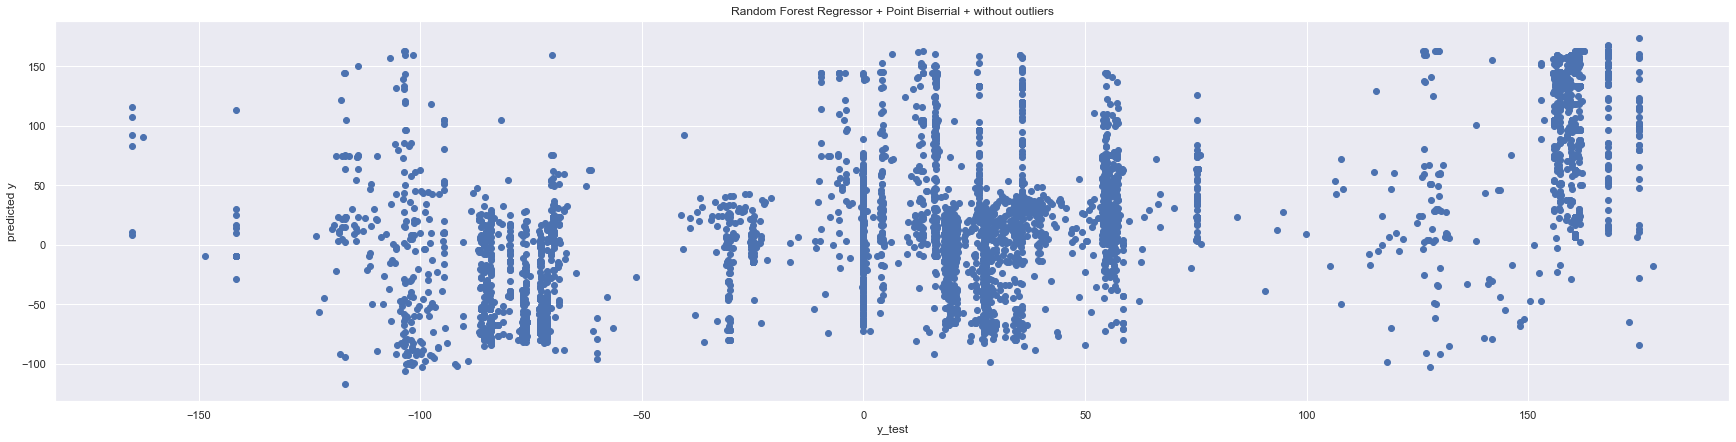

In [615]:
plt.scatter(x=y_test, y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title('Random Forest Regressor + Point Biserrial + without outliers')
plt.show()

Quite the same as with LDA Reducer.

##### Pearson Correlation

In [616]:
from kydavra import PearsonCorrelationSelector
pearson = PearsonCorrelationSelector()
selected_columns = pearson.select(df5, 'reclong')
selected_columns

['reclat']

In [617]:
from kydavra import PearsonCorrelationSelector
pearson = PearsonCorrelationSelector(min_corr=0.03)
selected_columns = pearson.select(df5, 'reclong')
selected_columns

['reclat', 'mass_scaled', 'nametype_Valid']

In [618]:
X = df5[['mass_scaled', 'nametype_Valid']]
y = df5[['reclat', 'reclong']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [619]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train, y_train)
pred = rdr.predict(X_test)

In [620]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 51.360765424390394
MSE: 3773.511371179652
RMSE: 61.42891315316959


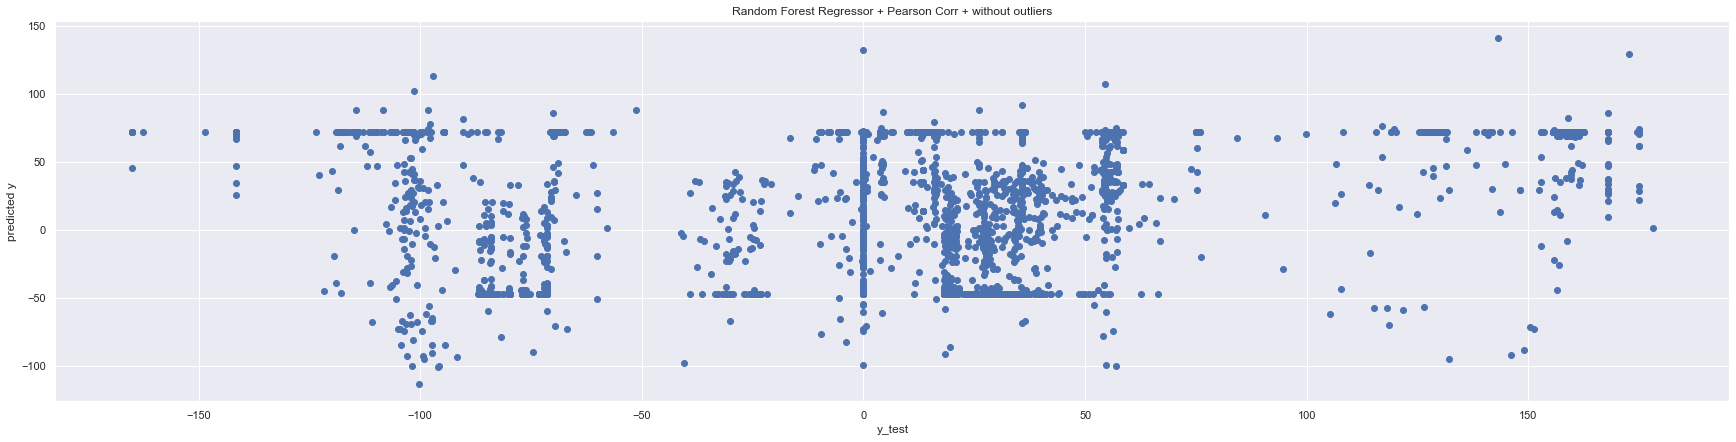

In [621]:
plt.scatter(x=y_test, y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title('Random Forest Regressor + Pearson Corr + without outliers')
plt.show()

This one, looks bad.

#### df with outliers


##### LDA Reducer

In [639]:
lda = LDAReducer()
selected_columns1 = lda.reduce(df_with_outliers, 'reclong')
selected_columns1.columns

Index(['reclat', 'reclong', 'year_scaled', 'mass_scaled', 'fall_Found',
       'nametype_Valid', 'recclass_cat'],
      dtype='object')

In [640]:
lda = LDAReducer()
selected_columns2 = lda.reduce(df_with_outliers, 'reclat')
selected_columns2.columns

Index(['reclat', 'reclong', 'year_scaled', 'mass_scaled', 'fall_Found',
       'nametype_Valid', 'recclass_cat'],
      dtype='object')

Again, same situation with selected cols. Let's see the Random Forest Regressor what will shou us.

In [641]:
X = selected_columns1.drop(['reclat', 'reclong'], axis = 1)
y = df_with_outliers[['reclat', 'reclong']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MAE: 25.664469659636055
MSE: 1961.5156484392205
RMSE: 44.28900143872314


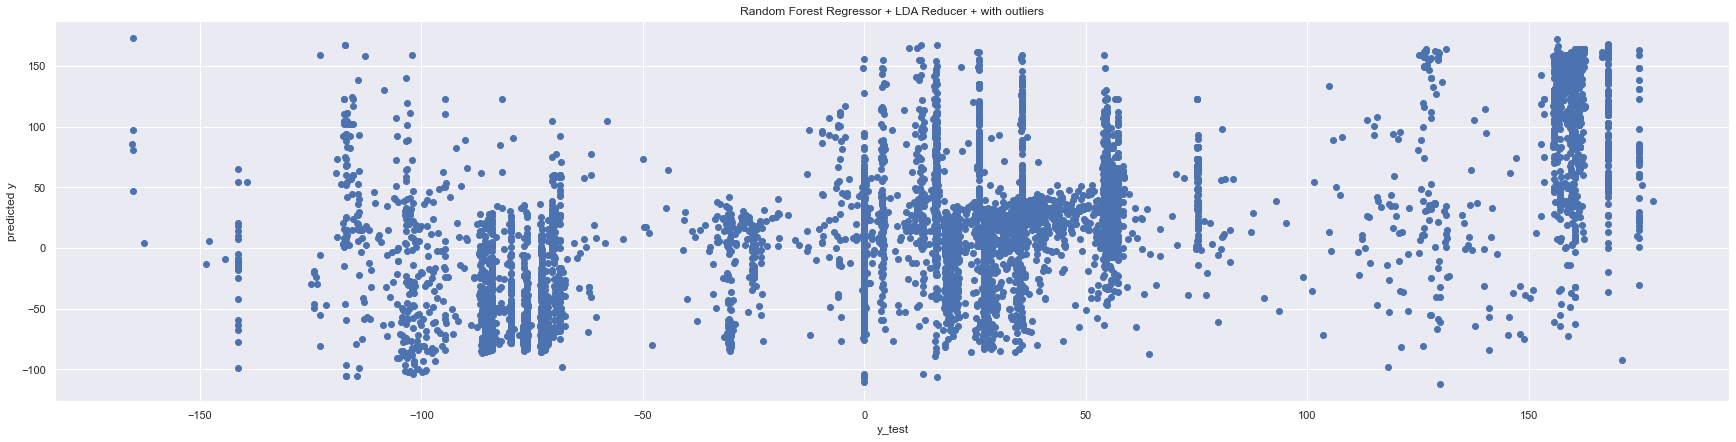

In [642]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train, y_train)
pred = rdr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
plt.scatter(x=y_test, y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title('Random Forest Regressor + LDA Reducer + with outliers')
plt.show()

##### Point Biserial Correlation Selector

In [643]:
point_biseral = PointBiserialCorrSelector()
selected_cols1 = point_biseral.select(df_with_outliers, 'reclong')
selected_cols1

['reclat', 'year_scaled', 'mass_scaled', 'recclass_cat']

In [644]:
point_biseral = PointBiserialCorrSelector()
selected_cols2 = point_biseral.select(df_with_outliers, 'reclat')
selected_cols2

['reclong', 'year_scaled', 'mass_scaled', 'recclass_cat']

In [645]:
X = df_with_outliers[['year_scaled', 'mass_scaled', 'recclass_cat']]
y = df_with_outliers[['reclat', 'reclong']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MAE: 26.016489627492145
MSE: 1986.292412960442
RMSE: 44.56784056873793


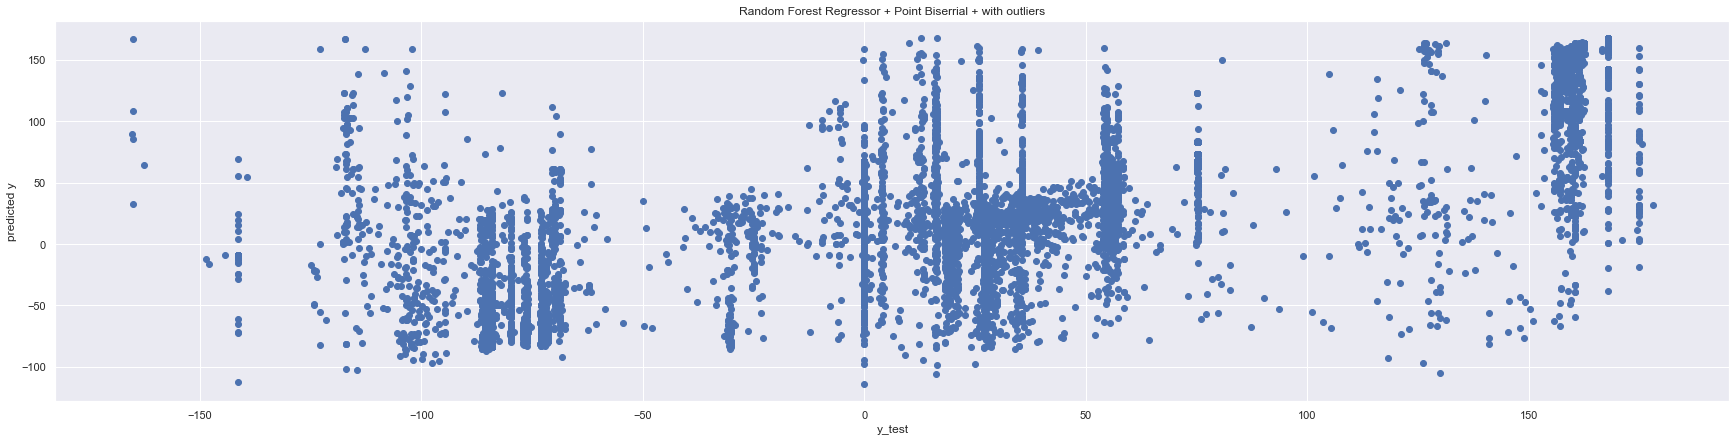

In [646]:
rdr = RandomForestRegressor()
rdr.fit(X_train, y_train)
pred = rdr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
plt.scatter(x=y_test, y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title('Random Forest Regressor + Point Biserrial + with outliers')
plt.show()

##### Perason Correlation

In [647]:
pearson = PearsonCorrelationSelector()
selected_columns = pearson.select(df_with_outliers, 'reclong')
selected_columns

['reclat']

In [648]:
pearson = PearsonCorrelationSelector()
selected_columns = pearson.select(df_with_outliers, 'reclat')
selected_columns

['year_scaled']

In [649]:
X = df_with_outliers[['year_scaled']]
y = df_with_outliers[['reclat', 'reclong']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MAE: 33.18323207304701
MSE: 2375.8559256001
RMSE: 48.742752544353706


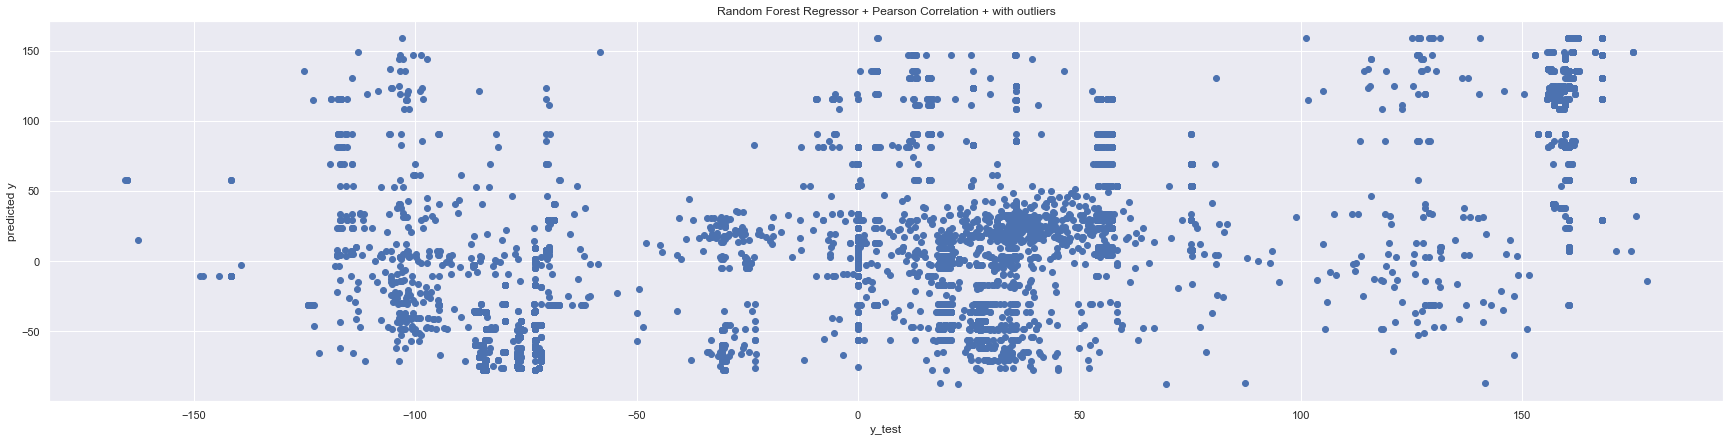

In [650]:
rdr = RandomForestRegressor()
rdr.fit(X_train, y_train)
pred = rdr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
plt.scatter(x=y_test, y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title('Random Forest Regressor + Pearson Correlation + with outliers')
plt.show()

<ul>
    <li> So, with <b>Feature Selection</b> and with outliers, the best results for this case was with <b>LDA Reducer</b>, where MAE was equal to 25,66. Meanwhile, for the df without outliers, no feature selection was needed for a MAE=24,26. </li>
    <li> In both dataframes (with and withou outliers), the worst Feature Selection, was Pearson Correlation, and without FS, Linear Regression was very bad. (MAE was 33 and 51).. </li>
    <li> Some shapes of lines can be seen in every graph, where the model was <b>Random Forest Regressor </b>.</li>
</ul>
Overall, that is all that I considered to do with this dataset. I will not write so many thoughts here, as I commented all the decisions and code from this notebook.